In [137]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import os
import subprocess
recon_dir = "/mnt/store1/dyt/recon/temp/"
os.chdir("/home/dyt/analysis_scripts/")

In [ ]:
cmd = ['python', './recon/reconstruct/reconst.py', '0', '1', '100', 'gen_base1', recon_dir]
subprocess.call(cmd)

In [138]:
cmd = ['python', './recon/reconstruct/reconst.py', '1', '1', '100', 'gen_base1', recon_dir]
subprocess.call(cmd)

0

In [139]:
cmd = ['python', './recon/reconstruct/reconst.py', '2', '1', '100', 'gen_base1', recon_dir]
subprocess.call(cmd)

0

In [129]:
import os
os.chdir("/home/dyt/analysis_scripts/fftcorr/")
from fftcorr import analyze

In [146]:
import matplotlib.pyplot as plt
import numpy as np
b=2.23
alpha=0.8

# pre-recon, fftcorr
result = np.loadtxt("/home/dyt/analysis_scripts/fftcorr/fftcorr.txt")
r = result[0, :]
xi_0_fft = result[1, :]
xi_2_fft = result[2, :]
# pre-recon, PC (Corrfunc)
data0 = np.loadtxt("/mnt/store1/dyt/emulator_1100box_planck-pre-recon/emulator_1100box_planck_00-1/z0.5-r0/gen_base1-auto-xi_0-smu-pre-recon-ar.txt")
data2 = np.loadtxt("/mnt/store1/dyt/emulator_1100box_planck-pre-recon/emulator_1100box_planck_00-1/z0.5-r0/gen_base1-auto-xi_2-smu-pre-recon-ar.txt")
xi_0 = data0[:, 1]
xi_2 = data2[:, 1]
# pre-recon, fftcorr mod
N = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_N-pre-recon.txt")
R = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_R-pre-recon.txt")
xi_0_recon0 = N[:, 3] / R[:, 3]
xi_2_recon0 = N[:, 4] / R[:, 3]
# post-recon-std 15
N = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_N-post-recon-std-15.0_hMpc.txt")
R = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_R-post-recon-std-15.0_hMpc.txt")
xi_0_recon1_15 = N[:, 3] / R[:, 3]
xi_2_recon1_15 = N[:, 4] / R[:, 3]
# post-recon-std 10
N = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_N-post-recon-std-10.0_hMpc.txt")
R = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_R-post-recon-std-10.0_hMpc.txt")
xi_0_recon1_10 = N[:, 3] / R[:, 3]
xi_2_recon1_10 = N[:, 4] / R[:, 3]
# post-recon-ite 15
N = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_N-post-recon-ite-15.0_hMpc.txt")
R = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_R-post-recon-ite-15.0_hMpc.txt")
xi_0_recon2_15 = N[:, 3] / R[:, 3]
xi_2_recon2_15 = N[:, 4] / R[:, 3]
# post-recon-ite 10
N = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_N-post-recon-ite-10.0_hMpc.txt")
R = np.loadtxt("/mnt/store1/dyt/recon/temp/gen_base1-auto-ft_corr_R-post-recon-ite-10.0_hMpc.txt")
xi_0_recon2_10 = N[:, 3] / R[:, 3]
xi_2_recon2_10 = N[:, 4] / R[:, 3]

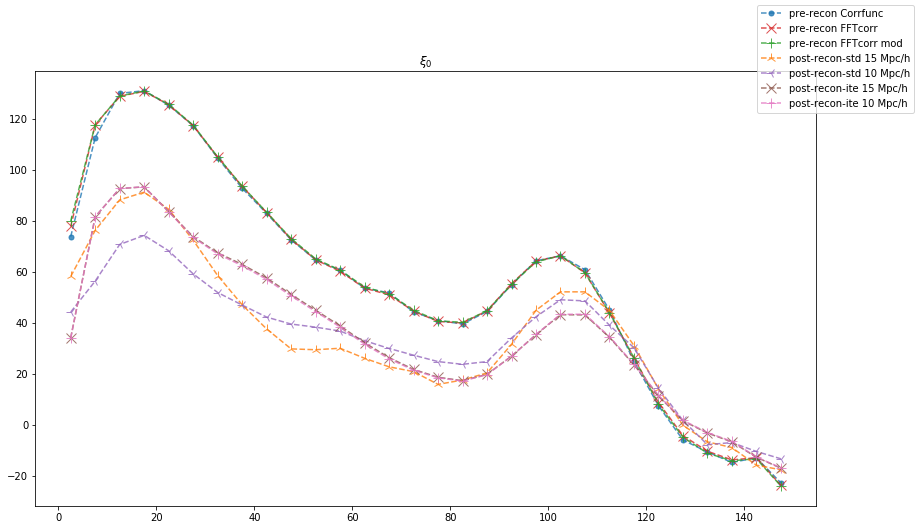

In [151]:
fig, ax = plt.subplots(figsize=(14, 8))
for xi, name, color, marker in zip(
    [xi_0, xi_0_fft, xi_0_recon0, xi_0_recon1_15, xi_0_recon1_10, xi_0_recon2_15, xi_0_recon2_10],
    ['pre-recon Corrfunc', 'pre-recon FFTcorr', 'pre-recon FFTcorr mod', 'post-recon-std 15 Mpc/h', 'post-recon-std 10 Mpc/h', 'post-recon-ite 15 Mpc/h', 'post-recon-ite 10 Mpc/h'],
    ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
    ['.', 'x', '+', '2', '3', 'x', '+']):
    ax.plot(r, xi*np.power(r, 2), marker+'--', alpha=alpha, ms=10, c=color, label=name)
fig.legend()
ax.set_title(r'$\xi_0$')
fig.savefig('corr_xi_0_post_recon.pdf')

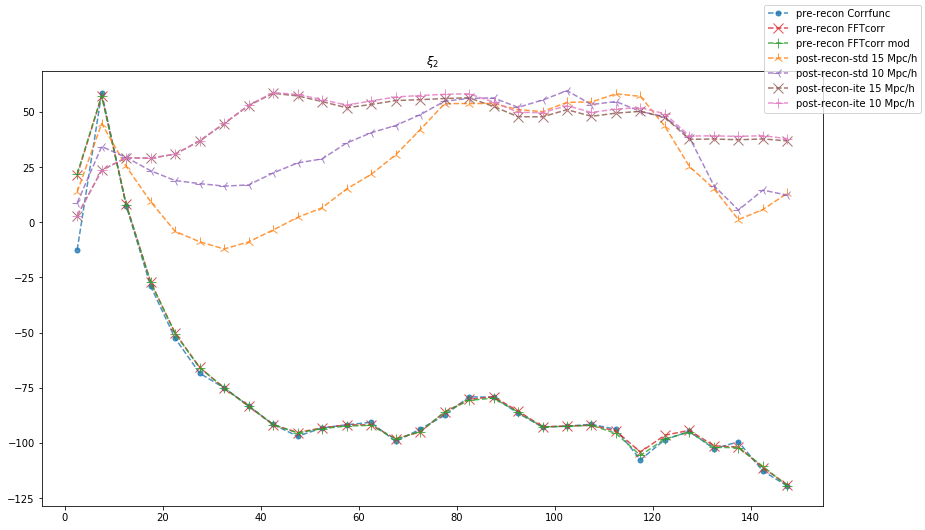

In [152]:
fig, ax = plt.subplots(figsize=(14, 8))
for xi, name, color, marker in zip(
    [xi_2, xi_2_fft, xi_2_recon0, xi_2_recon1_15, xi_2_recon1_10, xi_2_recon2_15, xi_2_recon2_10],
    ['pre-recon Corrfunc', 'pre-recon FFTcorr', 'pre-recon FFTcorr mod', 'post-recon-std 15 Mpc/h', 'post-recon-std 10 Mpc/h', 'post-recon-ite 15 Mpc/h', 'post-recon-ite 10 Mpc/h'],
    ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
    ['.', 'x', '+', '2', '3', 'x', '+']):
    ax.plot(r, xi*np.power(r, 2), marker+'--', alpha=alpha, ms=10, c=color, label=name)
fig.legend()
ax.set_title(r'$\xi_2$')
fig.savefig('corr_xi_2_post_recon.pdf')

Text(0.5,1,u'$\\xi_0$')

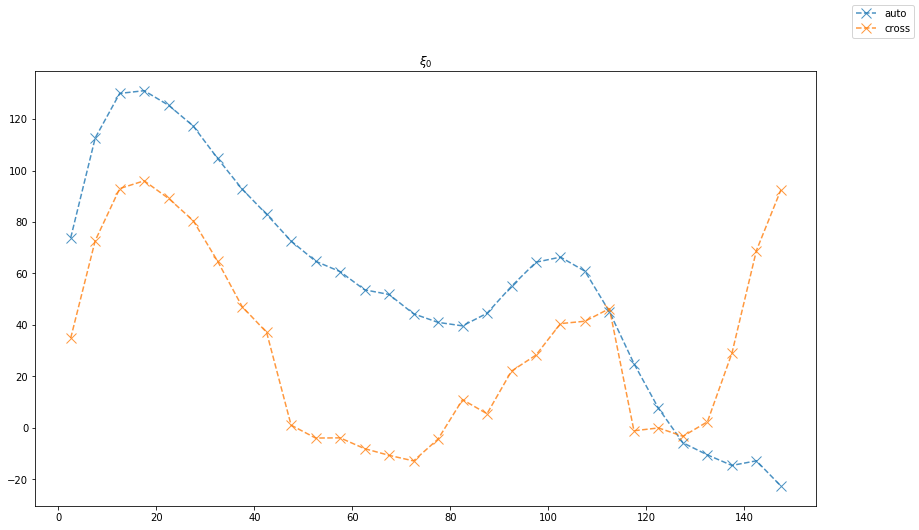

In [164]:
fig, ax = plt.subplots(figsize=(14, 8))
data0 = np.loadtxt("/mnt/store1/dyt/emulator_1100box_planck-recon-test/emulator_1100box_planck_00-1/z0.5-r0/gen_base1-auto-xi_0-smu-pre-recon-ar.txt")
data2 = np.loadtxt("/mnt/store1/dyt/emulator_1100box_planck-recon-test/emulator_1100box_planck_00-1/z0.5-r0/gen_base1-auto-xi_2-smu-pre-recon-ar.txt")
xi_0 = data0[:, 1]
xi_2 = data2[:, 1]
ax.plot(r, xi_0*np.power(r, 2), 'x--', alpha=alpha, ms=10, label='auto')
data0 = np.loadtxt("/mnt/store1/dyt/emulator_1100box_planck-recon-test/emulator_1100box_planck_00-1/z0.5-r0/gen_base1-cross_8-xi_0-post-recon-std-nr.txt")
data2 = np.loadtxt("/mnt/store1/dyt/emulator_1100box_planck-recon-test/emulator_1100box_planck_00-1/z0.5-r0/gen_base1-cross_8-xi_2-post-recon-std-nr.txt")
xi_0 = data0[:, 1]
xi_2 = data2[:, 1]
ax.plot(r, xi_0*np.power(r, 2), 'x--', alpha=alpha, ms=10, label='cross')
fig.legend()
ax.set_title(r'$\xi_0$')

In [208]:
RR = np.load("/mnt/store1/dyt/emulator_1100box_planck-recon/emulator_1100box_planck_00-0/z0.5-r6/gen_base1-cross_0-paircount-RR-post-recon-std-nr.npy")
import abacus_baofit as ab
reload(ab)
npairs, _ = ab.rebin_smu_counts(RR)

In [209]:
RR

array([(  0.,   1.,   0.        , 0.01,     0, 0.),
       (  0.,   1.,   0.        , 0.02,     0, 0.),
       (  0.,   1.,   0.        , 0.03,     0, 0.), ...,
       (149., 150., 149.49981689, 0.98, 25015, 0.),
       (149., 150., 149.5032196 , 0.99, 25051, 0.),
       (149., 150., 149.49768066, 1.  , 25171, 0.)],
      dtype=[('smin', '<f8'), ('smax', '<f8'), ('savg', '<f8'), ('mu_max', '<f8'), ('npairs', '<u8'), ('weightavg', '<f8')])

In [184]:
b = np.loadtxt('test.txt')

In [207]:
np.mean(b[0][:10])

inf

In [219]:
d = np.random.rand(int(5.5e5), 3).astype(np.float32)

In [223]:
%time
np.random.shuffle(d)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [210]:
for r in RR: print("{0:10.6f} {1:10.6f} {2:10.6f} {3:10.2f}"
                               " {4:10d} {5:10.6f}".format(r['smin'], r['smax'],
                                r['savg'], r['mu_max'], r['npairs'], r['weightavg']))

  0.000000   1.000000   0.000000       0.01          0   0.000000
  0.000000   1.000000   0.000000       0.02          0   0.000000
  0.000000   1.000000   0.000000       0.03          0   0.000000
  0.000000   1.000000   0.000000       0.04          0   0.000000
  0.000000   1.000000   0.000000       0.05          0   0.000000
  0.000000   1.000000   0.000000       0.06          0   0.000000
  0.000000   1.000000   0.000000       0.07          0   0.000000
  0.000000   1.000000   0.000000       0.08          0   0.000000
  0.000000   1.000000   0.000000       0.09          0   0.000000
  0.000000   1.000000   0.000000       0.10          0   0.000000
  0.000000   1.000000   0.000000       0.11          0   0.000000
  0.000000   1.000000   0.000000       0.12          0   0.000000
  0.000000   1.000000   0.000000       0.13          0   0.000000
  0.000000   1.000000   0.000000       0.14          0   0.000000
  0.000000   1.000000   0.000000       0.15          0   0.000000
  0.000000

 21.000000  22.000000  21.526373       0.60        524   0.000000
 21.000000  22.000000  21.509466       0.61        517   0.000000
 21.000000  22.000000  21.529041       0.62        613   0.000000
 21.000000  22.000000  21.489414       0.63        559   0.000000
 21.000000  22.000000  21.516239       0.64        490   0.000000
 21.000000  22.000000  21.493139       0.65        557   0.000000
 21.000000  22.000000  21.499580       0.66        500   0.000000
 21.000000  22.000000  21.515120       0.67        506   0.000000
 21.000000  22.000000  21.500795       0.68        504   0.000000
 21.000000  22.000000  21.489393       0.69        539   0.000000
 21.000000  22.000000  21.498476       0.70        506   0.000000
 21.000000  22.000000  21.524406       0.71        495   0.000000
 21.000000  22.000000  21.524010       0.72        500   0.000000
 21.000000  22.000000  21.502308       0.73        514   0.000000
 21.000000  22.000000  21.501497       0.74        504   0.000000
 21.000000

 52.000000  53.000000  52.516171       0.45       3256   0.000000
 52.000000  53.000000  52.487885       0.46       3098   0.000000
 52.000000  53.000000  52.510170       0.47       3091   0.000000
 52.000000  53.000000  52.504337       0.48       3050   0.000000
 52.000000  53.000000  52.504967       0.49       3153   0.000000
 52.000000  53.000000  52.521320       0.50       3145   0.000000
 52.000000  53.000000  52.500366       0.51       2810   0.000000
 52.000000  53.000000  52.502048       0.52       3043   0.000000
 52.000000  53.000000  52.498554       0.53       3159   0.000000
 52.000000  53.000000  52.509251       0.54       3250   0.000000
 52.000000  53.000000  52.507446       0.55       3298   0.000000
 52.000000  53.000000  52.495758       0.56       3146   0.000000
 52.000000  53.000000  52.502270       0.57       3111   0.000000
 52.000000  53.000000  52.494713       0.58       3120   0.000000
 52.000000  53.000000  52.520603       0.59       3055   0.000000
 52.000000

 82.000000  83.000000  82.511597       0.37       7599   0.000000
 82.000000  83.000000  82.496307       0.38       7347   0.000000
 82.000000  83.000000  82.501503       0.39       7716   0.000000
 82.000000  83.000000  82.499519       0.40       7722   0.000000
 82.000000  83.000000  82.500763       0.41       7718   0.000000
 82.000000  83.000000  82.504326       0.42       7344   0.000000
 82.000000  83.000000  82.498993       0.43       7716   0.000000
 82.000000  83.000000  82.499802       0.44       7618   0.000000
 82.000000  83.000000  82.500221       0.45       7597   0.000000
 82.000000  83.000000  82.512772       0.46       7603   0.000000
 82.000000  83.000000  82.493530       0.47       7705   0.000000
 82.000000  83.000000  82.507866       0.48       7967   0.000000
 82.000000  83.000000  82.496872       0.49       7837   0.000000
 82.000000  83.000000  82.512260       0.50       7620   0.000000
 82.000000  83.000000  82.502998       0.51       7464   0.000000
 82.000000

112.000000 113.000000 112.498352       0.44      14379   0.000000
112.000000 113.000000 112.499687       0.45      14146   0.000000
112.000000 113.000000 112.499634       0.46      14127   0.000000
112.000000 113.000000 112.501732       0.47      13998   0.000000
112.000000 113.000000 112.500832       0.48      14371   0.000000
112.000000 113.000000 112.498131       0.49      14155   0.000000
112.000000 113.000000 112.502724       0.50      14419   0.000000
112.000000 113.000000 112.503242       0.51      14123   0.000000
112.000000 113.000000 112.501198       0.52      14105   0.000000
112.000000 113.000000 112.496689       0.53      14119   0.000000
112.000000 113.000000 112.502647       0.54      14024   0.000000
112.000000 113.000000 112.502090       0.55      14048   0.000000
112.000000 113.000000 112.502525       0.56      14188   0.000000
112.000000 113.000000 112.496002       0.57      14293   0.000000
112.000000 113.000000 112.502113       0.58      14153   0.000000
112.000000

143.000000 144.000000 143.503204       0.70      23278   0.000000
143.000000 144.000000 143.504425       0.71      23243   0.000000
143.000000 144.000000 143.501541       0.72      23318   0.000000
143.000000 144.000000 143.501053       0.73      23145   0.000000
143.000000 144.000000 143.497574       0.74      22946   0.000000
143.000000 144.000000 143.500305       0.75      22669   0.000000
143.000000 144.000000 143.501602       0.76      22846   0.000000
143.000000 144.000000 143.501434       0.77      23036   0.000000
143.000000 144.000000 143.502487       0.78      22894   0.000000
143.000000 144.000000 143.502075       0.79      23021   0.000000
143.000000 144.000000 143.499237       0.80      23141   0.000000
143.000000 144.000000 143.503555       0.81      23306   0.000000
143.000000 144.000000 143.500458       0.82      22922   0.000000
143.000000 144.000000 143.504761       0.83      22764   0.000000
143.000000 144.000000 143.501328       0.84      22926   0.000000
143.000000